<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/AnomalyDetection/220915/tsod_Anomaly_Detection_for_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/DHI/tsod/blob/main/notebooks/Getting%20started.ipynb)

### https://github.com/DHI/tsod 를 참고
##### https://alpaca-gt.tistory.com/290 블로그에 참고해서 작성

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
!pip install tsod # from PyPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install https://github.com/DHI/tsod/archive/main.zip # dev version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/DHI/tsod/archive/main.zip


In [38]:
# if you run this on Colab, don't forget to install tsod first
# pip install tsod # from PyPI
# pip install https://github.com/DHI/tsod/archive/main.zip # dev version
import tsod

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/DHI/tsod/main/tests/data/example.csv", parse_dates=True, index_col=0)
df.head()

,value
datetime,
2000-01-01 00:00:00,0.000000
2000-01-01 01:00:00,1.152781
2000-01-01 02:00:00,1.450556
2000-01-01 03:00:00,0.958643
2000-01-01 04:00:00,1.174895


In [8]:
series = df.value

In [9]:
type(series)

pandas.core.series.Series

In [10]:
series

datetime
2000-01-01 00:00:00    0.000000
2000-01-01 01:00:00    1.152781
2000-01-01 02:00:00    1.450556
2000-01-01 03:00:00    0.958643
2000-01-01 04:00:00    1.174895
                         ...   
2000-01-06 08:59:00    0.968905
2000-01-06 09:59:00    1.080350
2000-01-06 10:59:00    1.401408
2000-01-06 11:59:00    1.441655
2000-01-06 12:59:00    1.745179
Name: value, Length: 134, dtype: float64

# Range

In [11]:
rd = tsod.RangeDetector(min_value=0.01, max_value=2.0)

res = rd.detect(series)
series[res]

datetime
2000-01-01 00:00:00    0.0
2000-01-01 13:00:00    3.0
2000-01-01 14:00:00    3.0
2000-01-03 07:00:00    2.5
2000-01-04 15:00:00    0.0
Name: value, dtype: float64

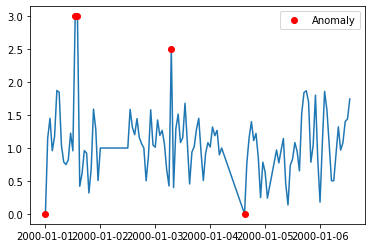

In [12]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Constant value

In [ ]:
cd = tsod.ConstantValueDetector()

res = cd.detect(series)
series[res]

datetime
2000-01-02 00:00:00    1.0
2000-01-02 01:00:00    1.0
2000-01-02 02:00:00    1.0
2000-01-02 03:00:00    1.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
Name: value, dtype: float64

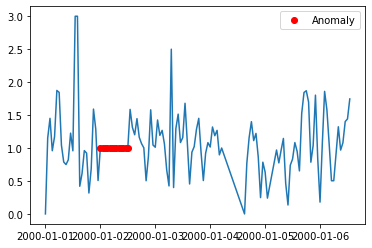

In [ ]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Combination

In [13]:
combined = tsod.CombinedDetector([tsod.RangeDetector(max_value=2.0),
                                     tsod.ConstantValueDetector()])

res = combined.detect(series)
series[res]

datetime
2000-01-01 13:00:00    3.0
2000-01-01 14:00:00    3.0
2000-01-02 00:00:00    1.0
2000-01-02 01:00:00    1.0
2000-01-02 02:00:00    1.0
2000-01-02 03:00:00    1.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
2000-01-03 07:00:00    2.5
Name: value, dtype: float64

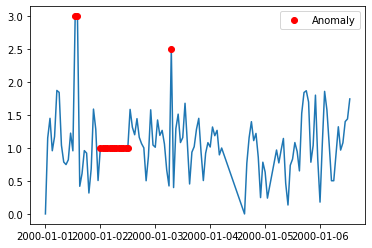

In [14]:
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Constant gradient

In [15]:
cgd = tsod.ConstantGradientDetector()

res = cgd.detect(series)

In [16]:
series[res]

datetime
2000-01-02 00:00:00    1.0
2000-01-02 01:00:00    1.0
2000-01-02 02:00:00    1.0
2000-01-02 03:00:00    1.0
2000-01-02 04:00:00    1.0
2000-01-02 05:00:00    1.0
2000-01-02 06:00:00    1.0
2000-01-02 07:00:00    1.0
2000-01-02 08:00:00    1.0
2000-01-02 09:00:00    1.0
2000-01-02 10:00:00    1.0
2000-01-02 11:00:00    1.0
2000-01-02 12:00:00    1.0
2000-01-04 05:00:00    1.0
2000-01-04 06:00:00    0.9
2000-01-04 07:00:00    0.8
2000-01-04 08:00:00    0.7
2000-01-04 09:00:00    0.6
2000-01-04 10:00:00    0.5
2000-01-04 11:00:00    0.4
2000-01-04 12:00:00    0.3
2000-01-04 13:00:00    0.2
2000-01-04 14:00:00    0.1
2000-01-04 15:00:00    0.0
Name: value, dtype: float64

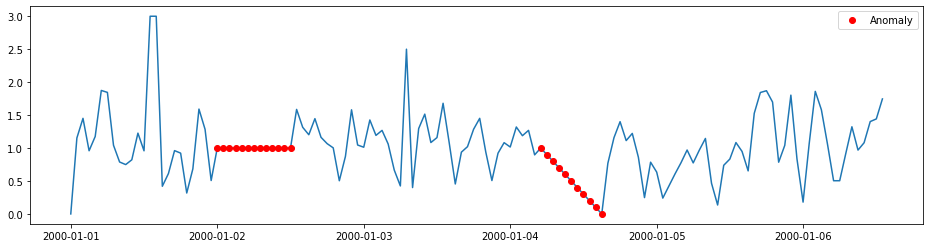

In [17]:
plt.figure(figsize=(16,4))
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()

# Gradient

In [19]:
magd = tsod.GradientDetector()
magd.fit(series[0:10])

res = magd.detect(series)
series[res]

datetime
2000-01-01 13:00:00    3.000000
2000-01-01 15:00:00    0.419531
2000-01-03 07:00:00    2.500000
2000-01-03 08:00:00    0.400000
Name: value, dtype: float64

Text(0.5, 1.0, 'GradientDetector(1.152781471/hr, direction:both)')

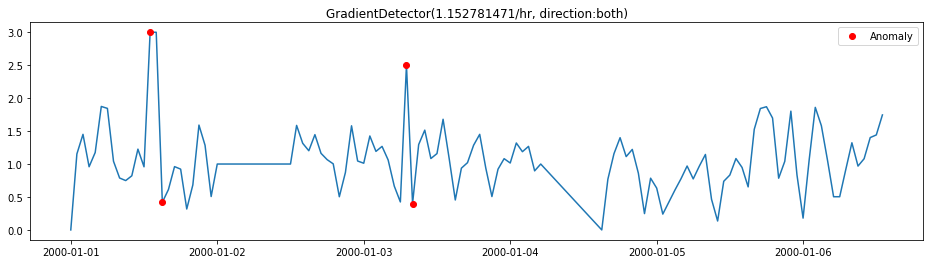

In [20]:
plt.figure(figsize=(16,4))
plt.plot(series)
plt.plot(series[res], 'ro',label='Anomaly')
plt.legend()
plt.title(magd)

# Rolling standard deviation

Can be used to detect sudden large variations

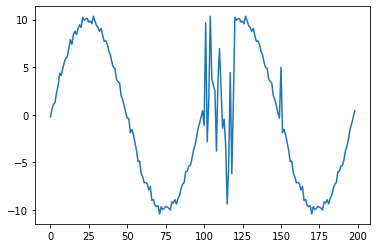

In [21]:
normal_data = pd.Series(np.random.normal(size=100,scale=0.3) + 10.0*np.sin(np.linspace(0,2*np.pi,num=100)))
abnormal_data = pd.Series(np.random.normal(size=20,scale=5.0) + normal_data.iloc[-1])

all_data = pd.concat([normal_data,abnormal_data,normal_data[21:]],ignore_index=True)

all_data[150]= 5.0

all_data.plot()

All data is within an acceptable range, but the variation is larger than expected and thus an anomaly.

In [24]:
rsd = tsod.RollingStandardDeviationDetector(window_size=10, center=True)

rsd.fit(normal_data)

res = rsd.detect(all_data)

In [26]:
all_data[res]

97     -0.925220
98     -0.255598
99      0.428378
100    -1.130980
101     9.643437
102    -2.827123
103     1.380112
104    10.343804
105     3.796921
106     3.093450
107     2.532945
108    -3.816075
109     3.661552
110     6.940264
111     2.692086
112    -1.422220
113    -0.455235
114    -3.204429
115    -9.370184
116    -5.114645
117     4.424827
118    -6.198392
119     1.116537
120    10.233262
121     9.940516
122    10.083347
123    10.107487
124     9.724419
147     0.933503
148     0.215092
149    -0.353930
150     5.000000
151    -1.880909
152    -1.540520
153    -2.124491
154    -2.907801
155    -3.770337
194    -2.483919
dtype: float64

Text(0.5, 1.0, 'RollingStandardDeviationDetector(window_size:10, max_std:2.109973497392879)')

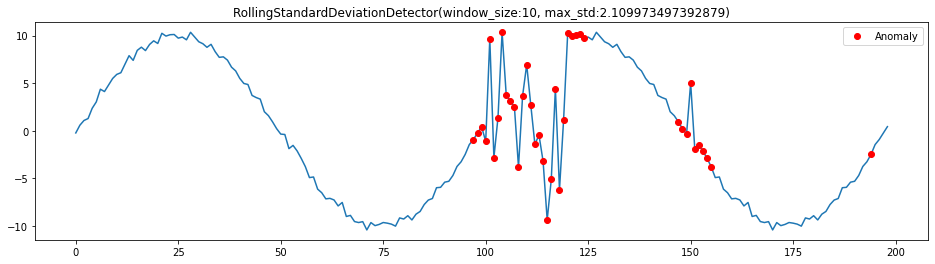

In [27]:
plt.figure(figsize=(16,4))
plt.plot(all_data)
plt.plot(all_data[res], 'ro',label='Anomaly')
plt.legend()
plt.title(rsd)

# Diff

The diff detector detects sudden changes, without consideration of the time elapsed 

In [32]:
drd = tsod.DiffDetector()
drd.fit(normal_data)

res = drd.detect(all_data)
all_data[res]

52     -1.880909
66     -9.006621
100    -1.130980
101     9.643437
102    -2.827123
103     1.380112
104    10.343804
105     3.796921
108    -3.816075
109     3.661552
110     6.940264
111     2.692086
112    -1.422220
114    -3.204429
115    -9.370184
116    -5.114645
117     4.424827
118    -6.198392
119     1.116537
120    10.233262
150     5.000000
151    -1.880909
165    -9.006621
dtype: float64

Text(0.5, 1.0, 'DiffDetector(1.3353886410430906, direction:both)')

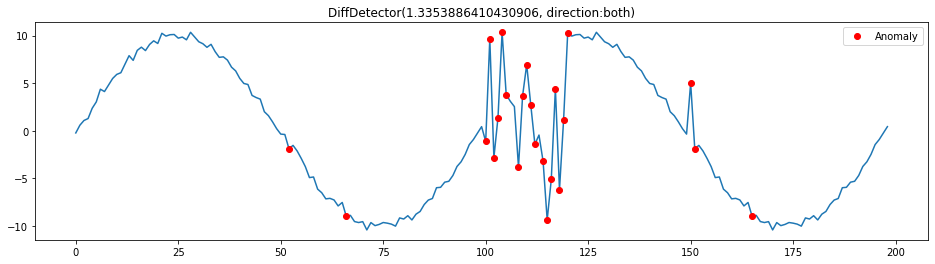

In [34]:
plt.figure(figsize=(16,4))
plt.plot(all_data)
plt.plot(all_data[res], 'ro',label='Anomaly')
plt.legend()
plt.title(drd)